# DALI positron source simulations 
Najmeh Mirian, Feb 2025 \
400 pc charge, \
1m particels , the simulation evnvolved the SC, 


In [1]:
import IPython
import numpy
import time
import scipy
import matplotlib
import ocelot
print('ocelot:', ocelot.__version__)
from __future__ import print_function
%matplotlib inline
from ocelot import *
#from Ocelot graphical modules
from ocelot.gui.accelerator import *
#from DALI_lattice import *

initializing ocelot...
ocelot: 24.03.0


In [2]:
from DALI_lattice import *
#Change RF parameters
phi=-3.5
LA1RC1.phi=phi; LA1RC2.phi=phi; LA2RC1.phi=phi; LA2RC1.phi=phi


0.7853981633974483 0.23561944901923448 0.19634954084936207
0.2617993877991494


In [13]:
#injection beam has 1 nq charge I changed to 400 pc 
p_array_init = load_particle_array("p_array.npz")
p_array_init.q_array=p_array_init.q_array * 400e-12/1e-9
print(p_array_init.q_array)
# chnging to 400 pc charg 
print(p_array_init)

[4.000004e-16 4.000004e-16 4.000004e-16 ... 4.000004e-16 4.000004e-16
 4.000004e-16]
ParticleArray: 
Ref. energy : 0.0056 GeV 
Ave. energy : 0.0056 GeV 
std(x)      : 3.272 mm
std(px)     : 1.296 mrad
std(y)      : 3.27 mm
std(py)     : 1.295 mrad
std(p)      : 0.0096
std(tau)    : 1.228 mm
Charge      : 0.4 nC 
s pos       : 0.0 m 
n particles : 999999



z = 14.094 / 14.094. Applied: SpaceChargeSpaceChargeeee
 time exec: 287.0232000350952 sec


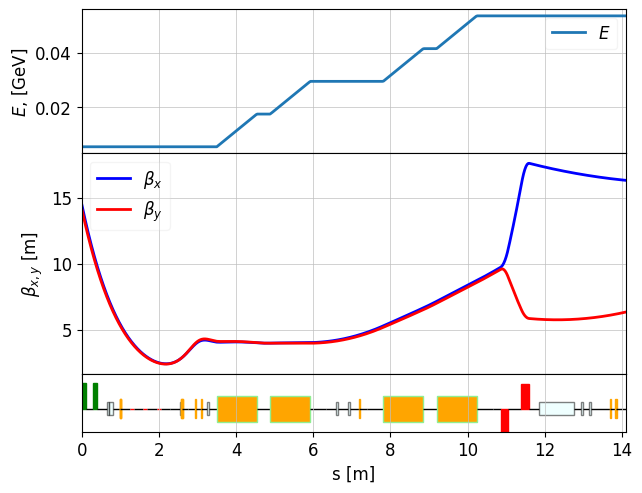

In [14]:
#Tracking the beam throuth Linac sections 
method = {"global": SecondTM}
lat_DALI_Linac = MagneticLattice(T02T1,method=method) 
# Initializing SpaceCharge
sc1 = SpaceCharge()
sc1.nmesh_xyz = [63, 63, 63]
sc1.step = 1

sc3 = SpaceCharge()
sc3.nmesh_xyz = [63, 63, 63]
sc3.step = 3

navi = Navigator(lat_DALI_Linac)
navi.unit_step = 0.01
# add physics processes from the first element to the last of the lattice
navi.add_physics_proc(sc1, START1I, enter_Linac1)
navi.add_physics_proc(sc3, enter_Linac1, lat_DALI_Linac.sequence[-1])

# definiing of unit step in [m]
p_array = deepcopy(p_array_init)
start = time.time()
start = time.time()
tws_Linac_track, p_Linac_array = track(lat_DALI_Linac, p_array, navi)
print("\n time exec:", time.time() - start, "sec")
plot_opt_func(lat_DALI_Linac, tws_Linac_track, top_plot=["E"],fig_name=0, legend=False)
plt.show()

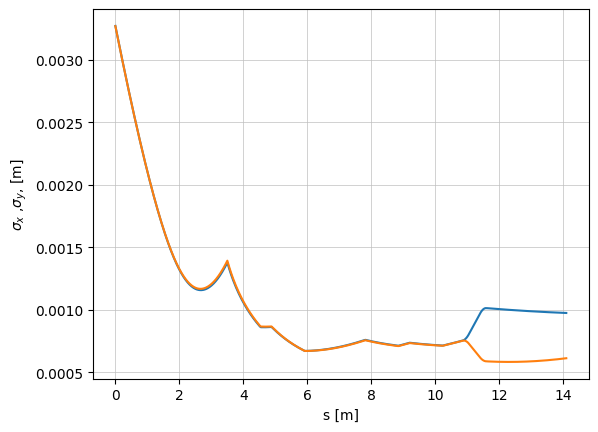

In [25]:
# bram size 
sigma_x = np.sqrt([tw.xx for tw in tws_Linac_track])
sigma_y = np.sqrt([tw.yy for tw in tws_Linac_track])
s = [tw.s for tw in tws_Linac_track]

plt.plot(s, sigma_x)
plt.plot(s, sigma_y)
plt.xlabel("s [m]")
plt.ylabel(r"$\sigma_x$ ,$\sigma_y$, [m]")
plt.show()

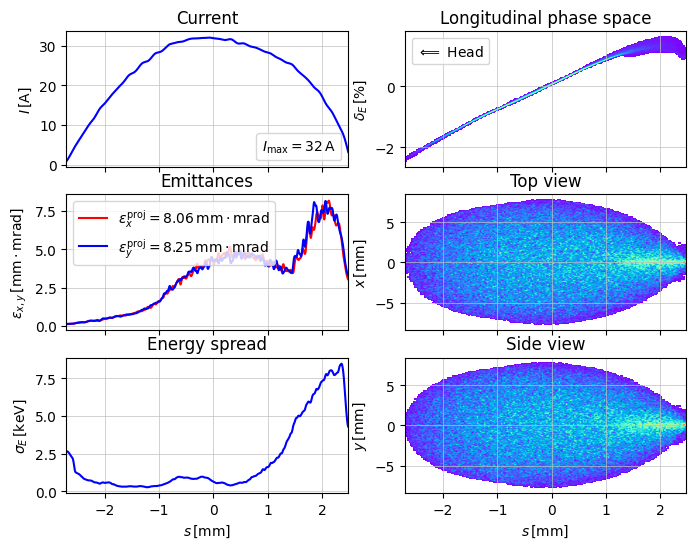

In [15]:
#injected beam 
show_e_beam(p_array_init, figsize=(8,6))
plt.show()

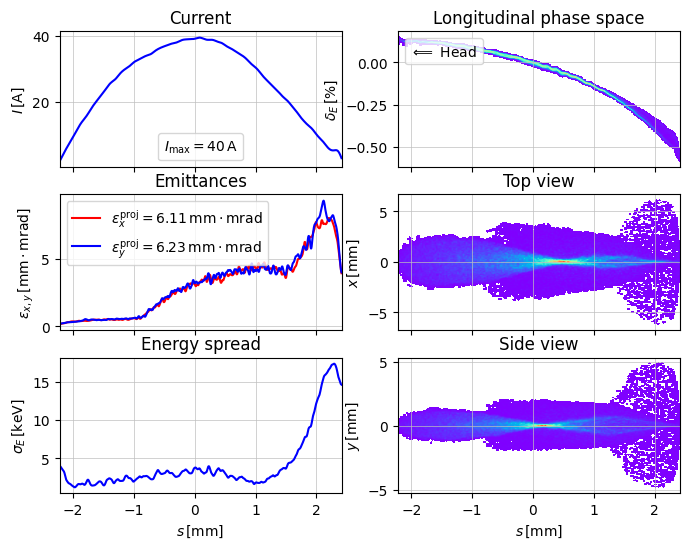

In [17]:
#Final beam at the end of Linac befor septum 
show_e_beam(p_Linac_array, figsize=(8,6))
plt.show()
save_particle_array("tracking_beam_Linac400PC.npz", p_Linac_array)
save_particle_array("tracking_beam_Inj400PC.npz", p_array_init)

z = 6.571238898038469 / 6.571238898038469. Applied:  aceChargeeee
 time exec: 61.10323786735535 sec


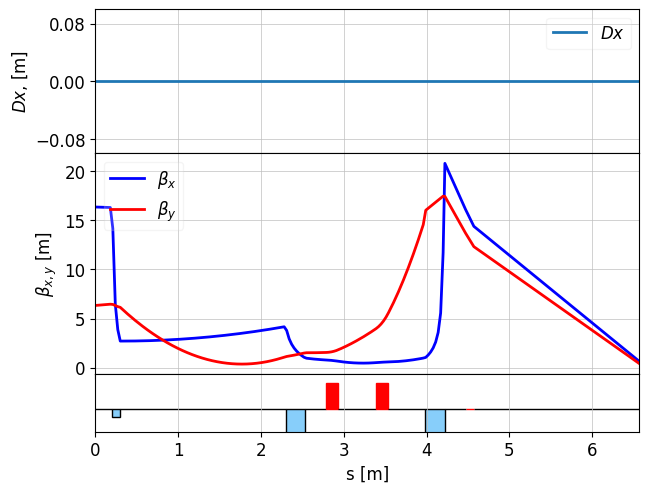

In [18]:
# tracking beam throgh the PS 
method = {"global": SecondTM}
lat_DALI_PS = MagneticLattice(Gun2PS, start=ExitT1, stop=None, method=method) 
# Initializing SpaceCharge

#p_array_init = load_particle_array("tracking_beam_Linac.npz")

navi = Navigator(lat_DALI_PS)
navi.unit_step = 0.01
sc3 = SpaceCharge()
sc3.nmesh_xyz = [63, 63, 63]
sc3.step = 3

# add physics processes from the first element to the last of the lattice

navi.add_physics_proc(sc3, lat_DALI_PS.sequence[0], lat_DALI_PS.sequence[-1])

# definiing of unit step in [m]
p_array = deepcopy(p_Linac_array)
#p_array = deepcopy(p_array_init)
start = time.time()

tws_PS_track, p_PS_array = track(lat_DALI_PS, p_array, navi)
print("\n time exec:", time.time() - start, "sec")
plot_opt_func(lat_DALI_PS, tws_PS_track,fig_name=0, legend=False)
plt.show()

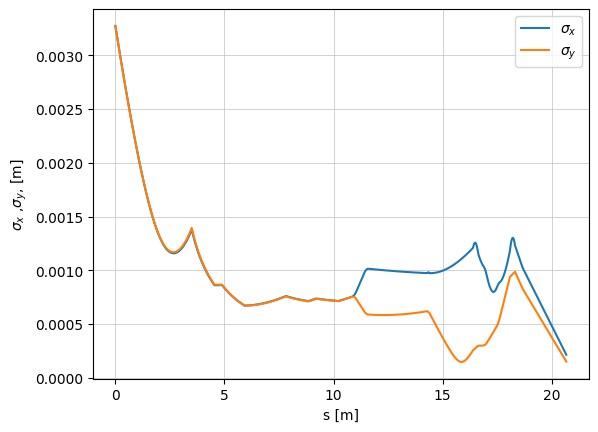

In [33]:
sigmaps_x = np.sqrt([tw.xx for tw in tws_PS_track])
sigmaps_y = np.sqrt([tw.yy for tw in tws_PS_track])
sps = [tw.s for tw in tws_PS_track]
sps=sps+s[-1]


sigmax=np.concatenate((sigma_x , sigmaps_x ))
sigmay=np.concatenate((sigma_y , sigmaps_y ))
S=np.concatenate((s,sps))
plt.plot(S, sigmax,label='$\sigma_x$')
plt.plot(S, sigmay, label='$\sigma_y$')
plt.xlabel("s [m]")
plt.ylabel(r"$\sigma_x$ ,$\sigma_y$, [m]")
plt.legend()
plt.show()

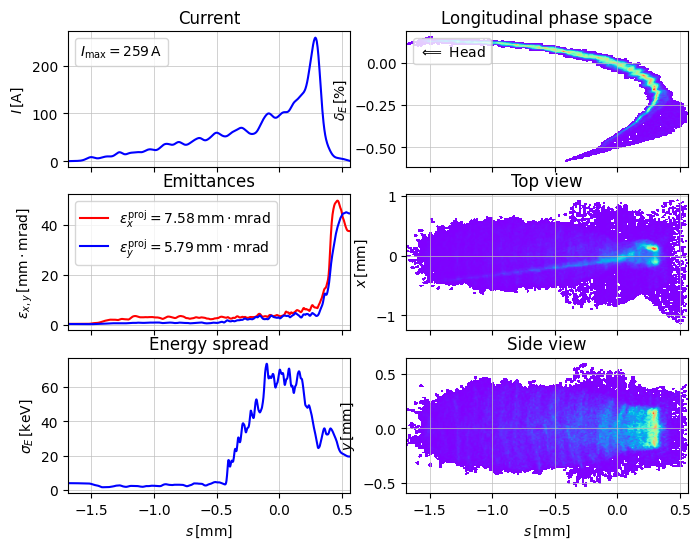

In [19]:
# the beam at PS point 
show_e_beam(p_PS_array, figsize=(8,6))
plt.show()
save_particle_array("tracking_beam_PS.npz", p_PS_array)


In [21]:
lat_DALI_PS = MagneticLattice(Gun2PS) 
# initialization of Twiss object
tws0 = Twiss()
tws0.E       = 0.0055933376
tws0.emit_x  = 7.365138174912308e-07
tws0.emit_y  = 7.534879456221737e-07
tws0.beta_x  = 14.536983646893802
tws0.beta_y  = 14.193144329608034
tws0.alpha_x = 5.668202451983896
tws0.alpha_y = 5.532646004350875
tws0.gamma_x = 2.278912864000848
tws0.gamma_y = 2.2271436882043365


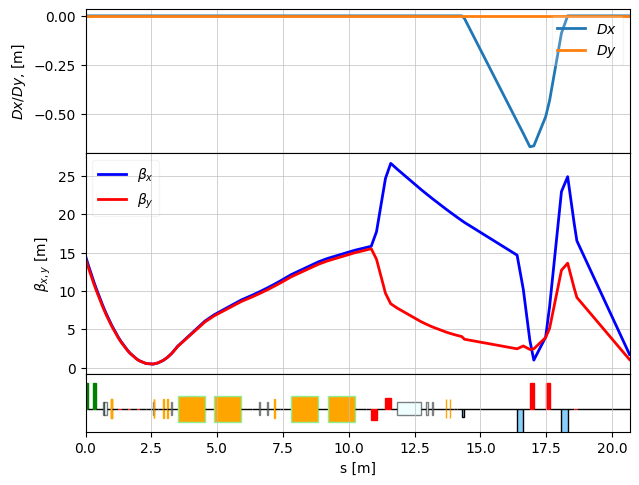

In [23]:
# the opticse in whole Gun to PS 
twsPS= twiss(lat_DALI_PS,tws0 )
plot_opt_func(lat_DALI_PS, twsPS, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()